In [36]:
import numpy as np 
import pandas as pd

In [38]:
df = pd.read_csv('../dataset.csv', parse_dates=['Datetime'])
df.head()

,Datetime,Close,SMA7,SMA20,SMA50,SMA200,EMA21,EMA50,EMA200,RSI14,...,Vol_Ratio,OBV,Price_Change,Price_Momentum_5,Price_Momentum_20,Trend_Strength,Vol_Regime,Resistance,Support,SR_Ratio
0,2024-09-17 13:30:00+00:00,238.250000,237.371429,237.898251,241.466461,245.397599,238.250000,238.250000,238.250000,34.421602,...,1.0,0.0,-0.004239,0.0,0.0,0,0,240.289597,235.300003,0.5
1,2024-09-17 14:30:00+00:00,237.240005,237.371429,237.898251,241.466461,245.397599,237.720955,237.734903,237.742478,34.421602,...,1.0,-689386.0,-0.004239,0.0,0.0,0,0,240.289597,235.300003,0.5
2,2024-09-17 15:30:00+00:00,237.009995,237.371429,237.898251,241.466461,245.397599,237.461057,237.483538,237.495871,34.421602,...,1.0,-1354723.0,-0.000970,0.0,0.0,0,0,240.289597,235.300003,0.5
3,2024-09-17 16:30:00+00:00,237.059998,237.371429,237.898251,241.466461,245.397599,237.346037,237.371217,237.385263,34.421602,...,1.0,-691637.0,0.000211,0.0,0.0,0,0,240.289597,235.300003,0.5
4,2024-09-17 17:30:00+00:00,237.410004,237.371429,237.898251,241.466461,245.397599,237.361377,237.379607,237.390310,34.421602,...,1.0,-185999.0,0.001476,0.0,0.0,0,0,240.289597,235.300003,0.5


In [39]:
len(df)

1709

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       157
           1       1.00      0.99      1.00       185

    accuracy                           1.00       342
   macro avg       1.00      1.00      1.00       342
weighted avg       1.00      1.00      1.00       342

Accuracy: 0.9970760233918129


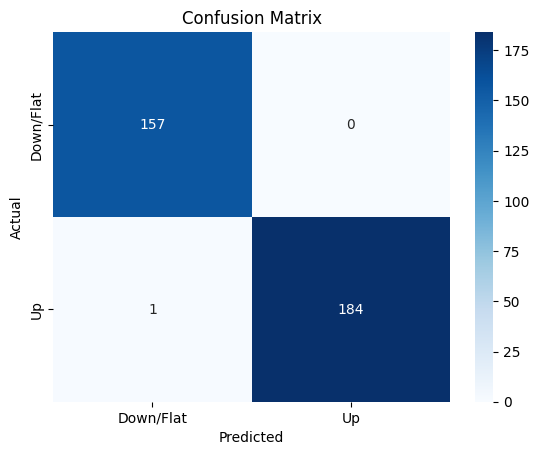

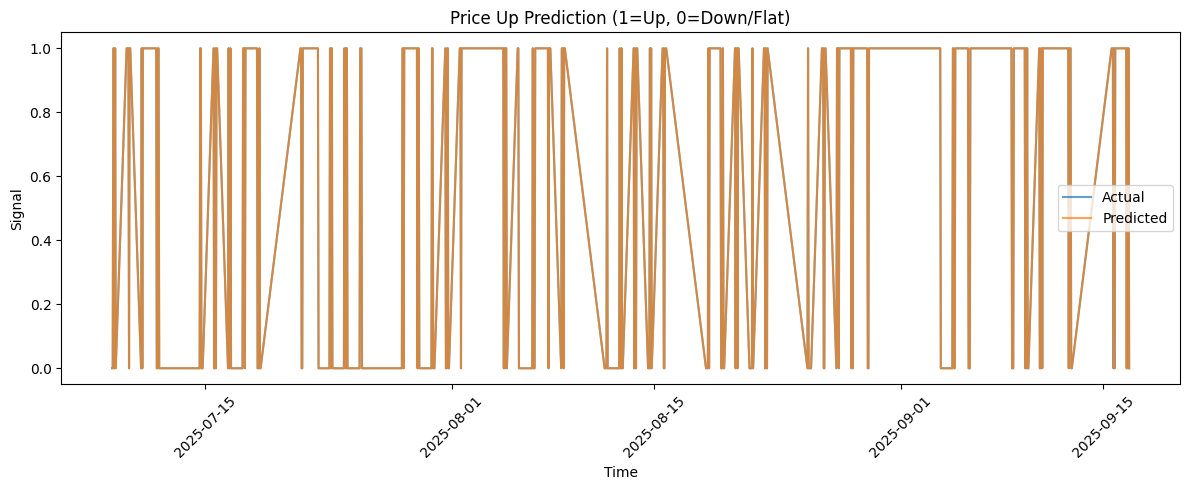

In [ ]:
df["Price_Up"] = (df["Close"].diff() > 0).astype(int)

# 3. Drop empty rows
df = df.dropna()

# 4. Features (all except Datetime, target, and other non-numeric cols if any)
X = df.drop(columns=["Datetime", "Price_Up"])
y = df["Price_Up"]

# 5. Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=False  # no shuffle for time series
)

# 7. Train classifier (RandomForest)
model = RandomForestClassifier(
    n_estimators=200, max_depth=10, random_state=42, class_weight="balanced"
)
model.fit(X_train, y_train)

# 8. Predictions
y_pred = model.predict(X_test)

# 9. Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Down/Flat", "Up"],
            yticklabels=["Down/Flat", "Up"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 10. Plot actual vs predicted
plt.figure(figsize=(12,5))
plt.plot(df["Datetime"].iloc[-len(y_test):], y_test.values, label="Actual", alpha=0.7)
plt.plot(df["Datetime"].iloc[-len(y_test):], y_pred, label="Predicted", alpha=0.7)
plt.legend()
plt.title("Price Up Prediction (1=Up, 0=Down/Flat)")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

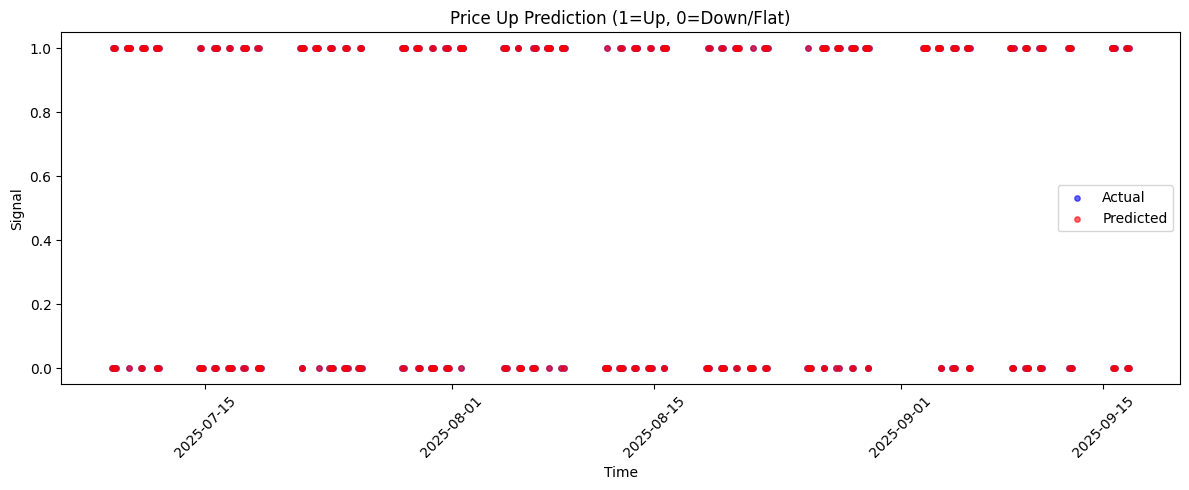

In [43]:
plt.figure(figsize=(12,5))
time_index = df["Datetime"].iloc[-len(y_test):]

plt.scatter(time_index, y_test.values, label="Actual", alpha=0.6, s=15, color="blue")
plt.scatter(time_index, y_pred, label="Predicted", alpha=0.6, s=15, color="red")

plt.legend()
plt.title("Price Up Prediction (1=Up, 0=Down/Flat)")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [44]:
import joblib 

In [45]:
joblib.dump(model, 'classification_best_model.pkl')

['classification_best_model.pkl']

In [46]:
joblib.dump(scaler, 'classification_scaler.pkl')

['classification_scaler.pkl']